马尔可夫性质（Markov property）：指一个随机过程中当前状态的概率分布，只与前一个状态有关，而与之前的状态序列无关。

布朗运动也叫作维纳过程，简单理解就是每个极小的时刻内，其变化量的变动是随机的，服从正态分布，且任何两个不重叠的时间内，变化量之间是相互独立的（也就是无记忆性，具有马尔可夫性质），布朗运动虽然连续，处处不可微分。用数学公式来表示即

$$
dS = dz = \epsilon \sqrt{dt}
$$

求出解为
$$
S_t = S_0 + \epsilon \sqrt{dz}
$$


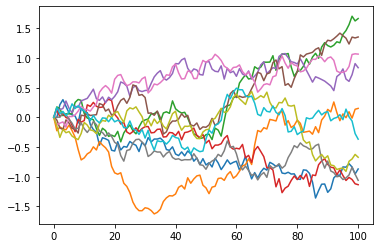

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numba
S0 = 0 #起点设置
T =1 #假定模拟一年的时间
paths = 10 #模拟路径数量
steps = 100 #将1年分为100个时间间隔
dt = T/steps #每个时间间隔的长度
S_path = np.zeros((steps+1,paths))#创建一个101行（第一行为S0）、10列的矩阵，用来准备储存模拟情况
S_path[0] = S0 #将第一行（S0）赋值为S0
rn = np.random.standard_normal((S_path.shape)) ## 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
for step in range(1,steps+1):
    S_path[step] = S_path[step-1] + np.sqrt(dt)*rn[step-1]
plt.plot(S_path[:,:])
plt.show()

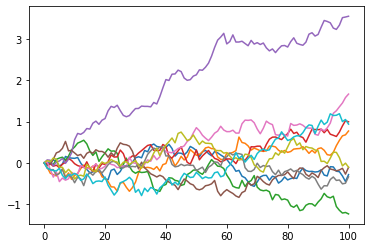

In [6]:
#封装
def standar_brownian(steps,paths,T,S0):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] + rn[step-1]*np.sqrt(dt)
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = standar_brownian(steps = 100,paths = 10,T = 1,S0 = 0)